# K means clustering

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()  # for plot styling
from IPython.display import Image

# sample data visualization

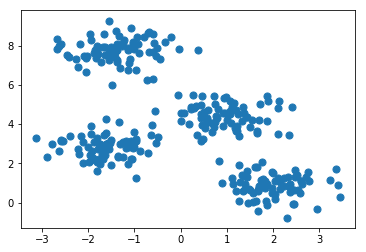

In [34]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


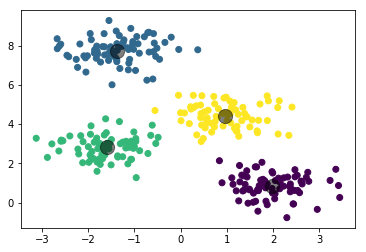

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)

centers = kmeans.cluster_centers_
#print(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

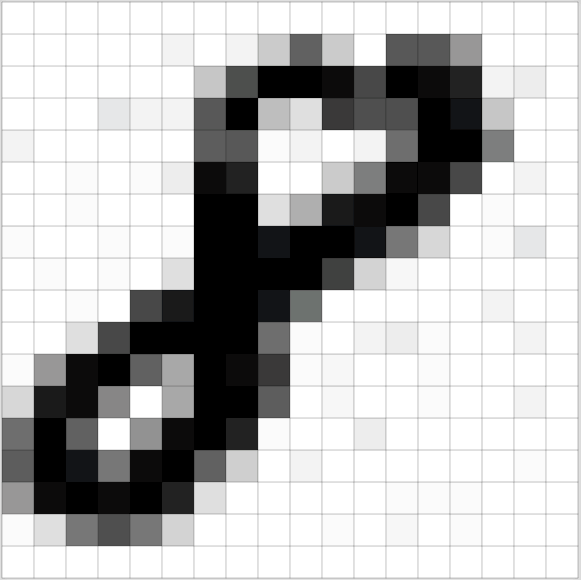

In [5]:
Image(filename='./images/grayscale.gif', width=400) 

# Real time example

# Example Hand written digits

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
a=digits.images[190]
digits.target[190]


3

# Gray scale

In [ ]:
Image()

# data set exploring

In [39]:
print(digits.data.shape)

(1797, 64)


In [40]:
digits.images[0].shape

(8, 8)

In [41]:
%matplotlib inline
from matplotlib import pyplot as plt
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

# Visualizing dataset

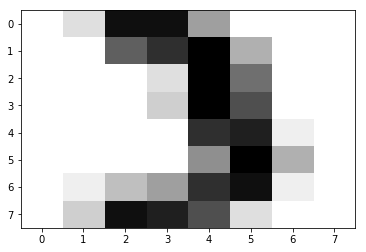

In [42]:
plt.imshow(a,interpolation='nearest', aspect='auto',cmap=plt.cm.binary)

# Sklearn implementation of kmeans

In [43]:
from sklearn.cluster import KMeans

In [44]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

In [45]:
kmeans.labels_[190]

1

# visualizing centers 

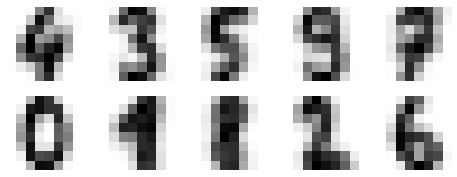

In [75]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center,  cmap=plt.cm.binary) 
     
        

In [82]:
digits.target[9]

9

In [97]:
clusters

array([5, 7, 7, ..., 7, 3, 3])

# evaluating the model

In [98]:
from scipy.stats import mode
import numpy as np
labels = np.zeros_like(clusters)
print(labels.shape,clusters.shape)
for i in range(10):
    mask = (clusters == i)
    #print(mask)
    #print(digits.target[mask])
    labels[mask] = mode(digits.target[mask])[0]
    #print ((i==clusters)*1)
    #print( mode(digits.target[mask])
    

from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

(1797,) (1797,)


0.7935447968836951

# generating confusion matrix

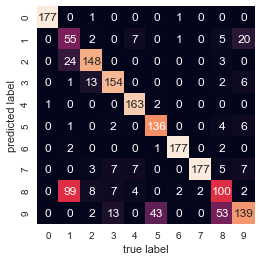

In [50]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');